In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('d1.csv')

In [3]:
df.head()


,Month,Year,Total_Sales,Electronics,Clothing,Home_Goods,Promotional_Campaign
0,January,2021,20000,8000,6000,6000,Seasonal Discount
1,February,2021,18000,7000,5000,6000,No Promotion
2,March,2021,22000,9000,7000,6000,Holiday Sale
3,April,2021,25000,10000,8000,7000,Spring Promotion
4,May,2021,23000,8500,7500,7000,Seasonal Discount


In [4]:
df['Date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str))

C:\Users\HP\AppData\Local\Temp\ipykernel_8136\3238571645.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str))


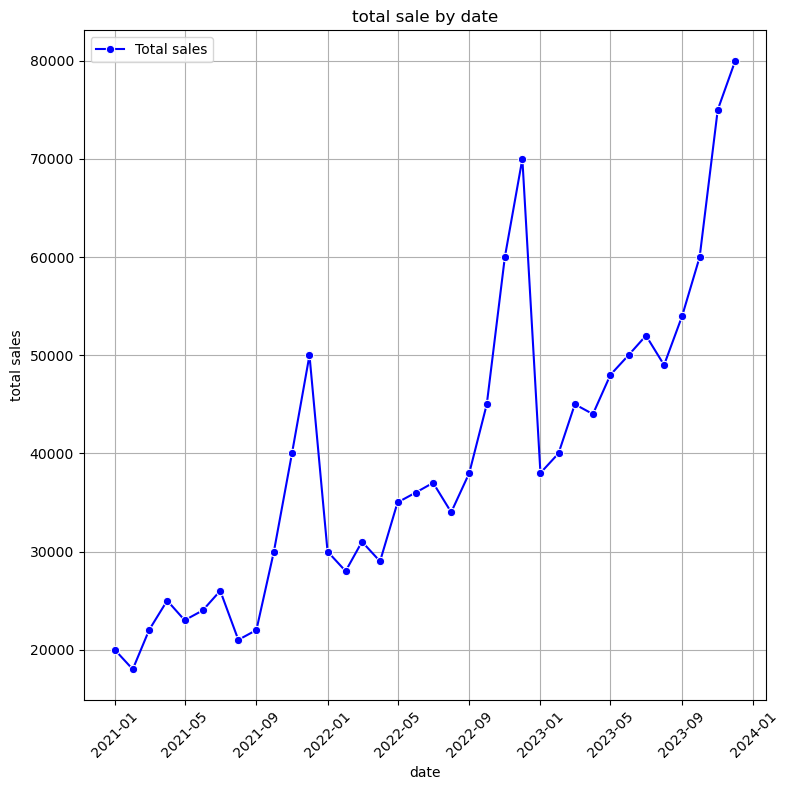

In [5]:
plt.figure(figsize=(8,8))
sns.lineplot(x=df['Date'],y=df['Total_Sales'],marker='o',linestyle='-',label='Total sales',color='b')
plt.title("total sale by date")
plt.xlabel('date')
plt.ylabel('total sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

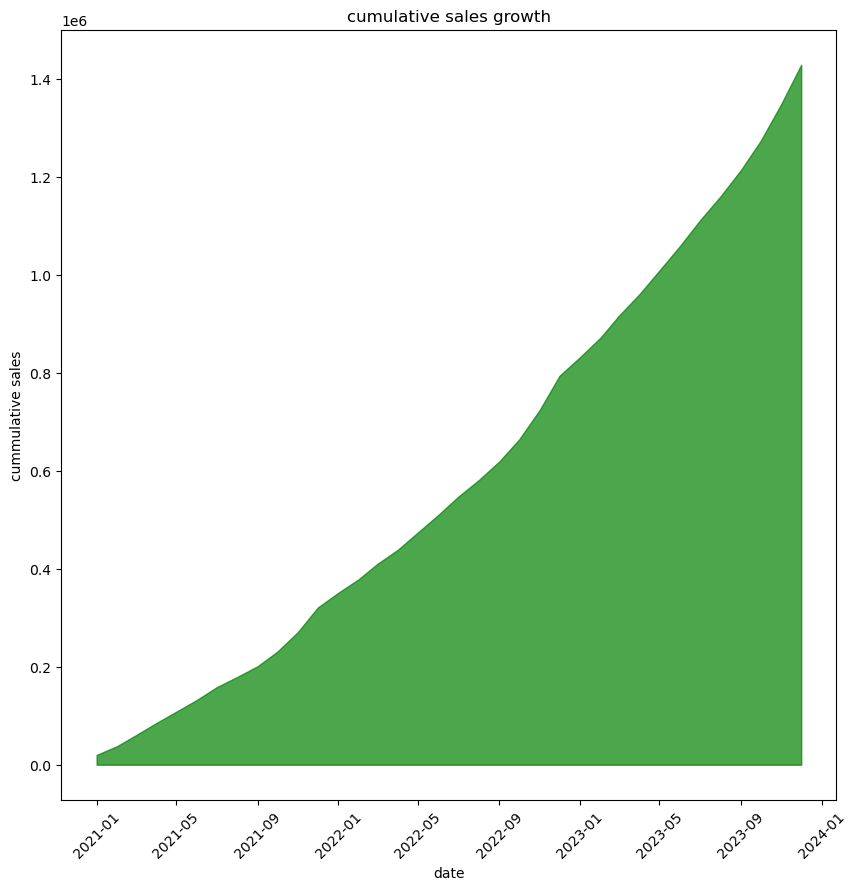

In [6]:
df['cumulative_sales']=df['Total_Sales'].cumsum()
plt.figure(figsize=(10,10))
plt.fill_between(df['Date'],df['cumulative_sales'],color='green',alpha=0.7)
plt.xlabel('date')
plt.ylabel('cummulative sales')
plt.title('cumulative sales growth')
plt.xticks(rotation=45)
plt.show()

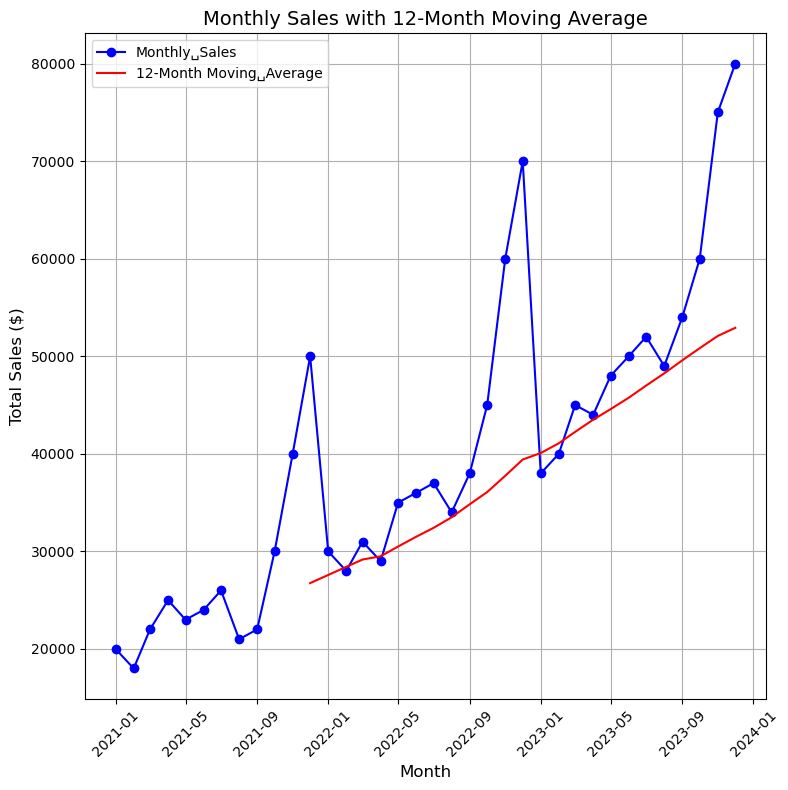

In [7]:
df['moving_average']=df['Total_Sales'].rolling(window=12).mean()
plt.figure(figsize=(8,8))
plt.plot(df['Date'], df['Total_Sales'], marker='o', color='b', label='Monthly␣Sales')
plt.plot(df['Date'], df['moving_average'], color='r', label='12-Month Moving␣Average')
plt.title('Monthly Sales with 12-Month Moving Average', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

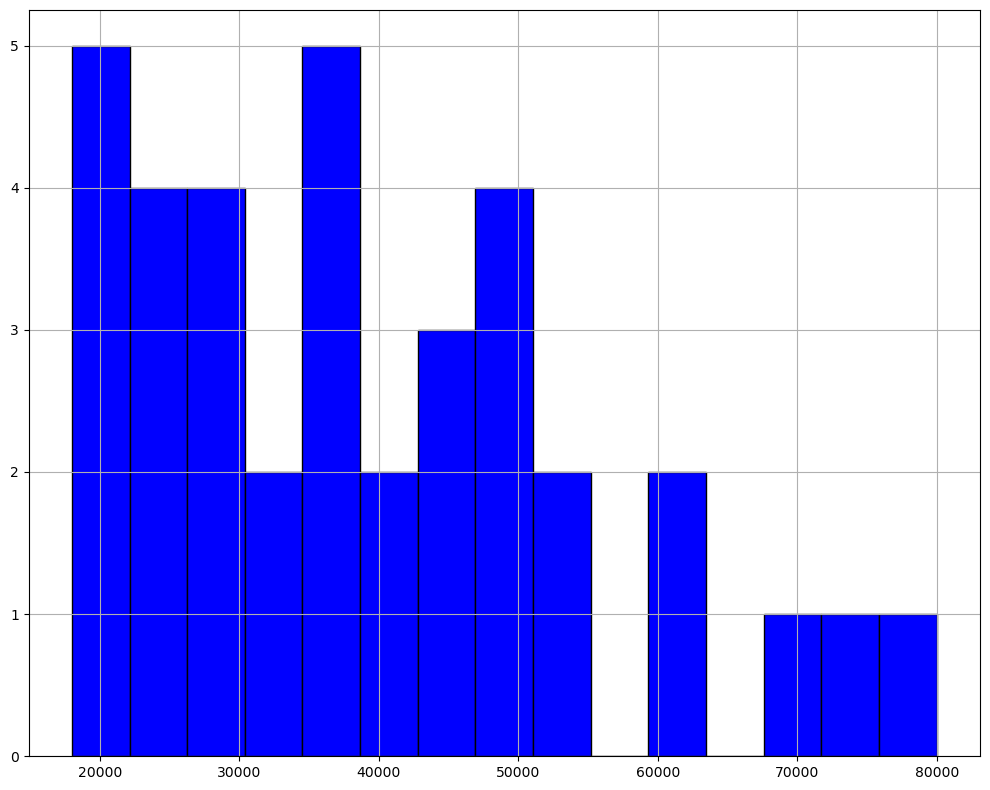

In [8]:
plt.figure(figsize=(10,8))
plt.hist(df['Total_Sales'],bins=15,color='blue',edgecolor='black')
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
df=pd.read_csv('d2.csv')
df.head()

,Month,Year,Electronics,Clothing,Home_Goods,Toys,Total_Sales
0,January,2021,8000,6000,5000,3000,22000
1,February,2021,7000,5000,4000,2000,18000
2,March,2021,9000,7000,6000,3500,22000
3,April,2021,10000,8000,7000,4000,30000
4,May,2021,8500,7500,6000,3500,23000


In [10]:
df['Date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str))
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_8136\3198602048.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str))


,Month,Year,Electronics,Clothing,Home_Goods,Toys,Total_Sales,Date
0,January,2021,8000,6000,5000,3000,22000,2021-01-01
1,February,2021,7000,5000,4000,2000,18000,2021-02-01
2,March,2021,9000,7000,6000,3500,22000,2021-03-01
3,April,2021,10000,8000,7000,4000,30000,2021-04-01
4,May,2021,8500,7500,6000,3500,23000,2021-05-01


In [11]:
df.set_index('Date',inplace=True)

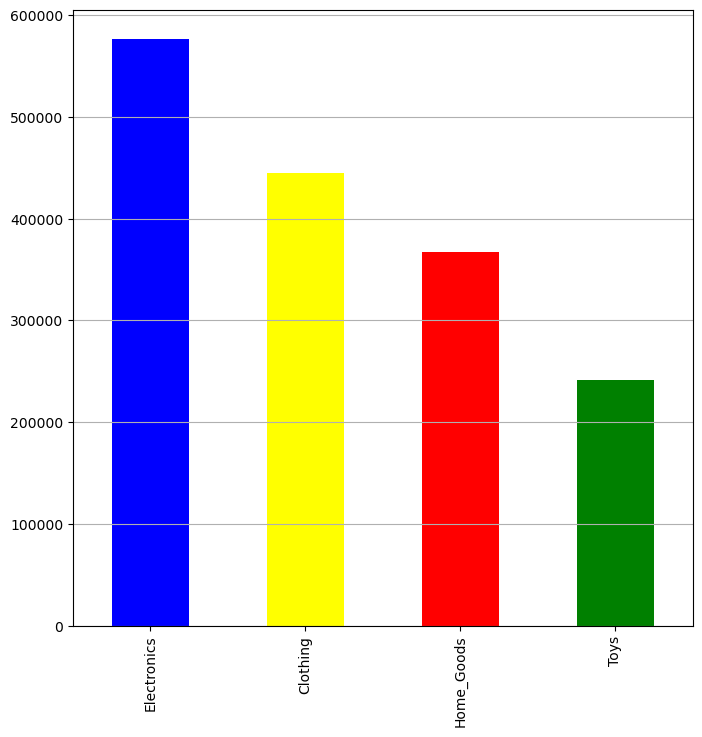

In [12]:
cateogery_totals=df[['Electronics','Clothing','Home_Goods','Toys']].sum()
plt.figure(figsize=(8,8))
cateogery_totals.plot(kind='bar',color=['blue','yellow','red','green'])
plt.grid(axis='y')
plt.show()

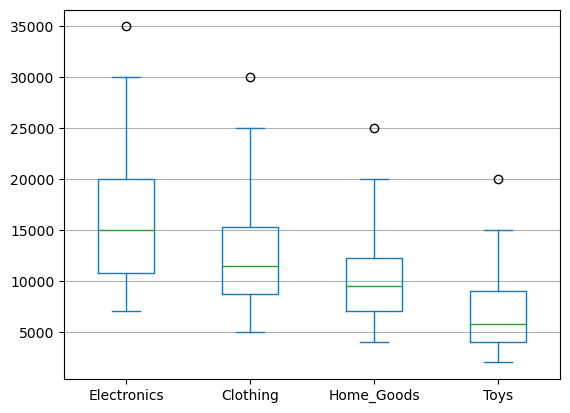

In [13]:
df[['Electronics','Clothing','Home_Goods','Toys']].plot(kind='box')
plt.grid(axis='y')
plt.show()

<Figure size 1000x1000 with 0 Axes>

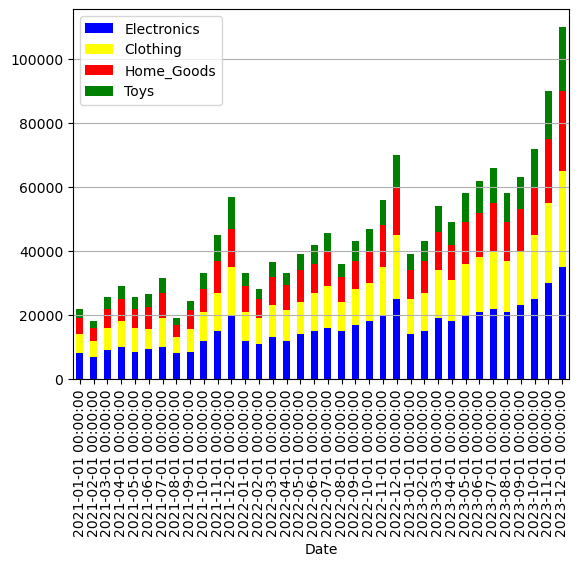

In [14]:
plt.figure(figsize=(10,10))
df[['Electronics','Clothing','Home_Goods','Toys']].plot(kind='bar',stacked=True,color=['blue','yellow','red','green'])
plt.grid(axis='y')
plt.show()

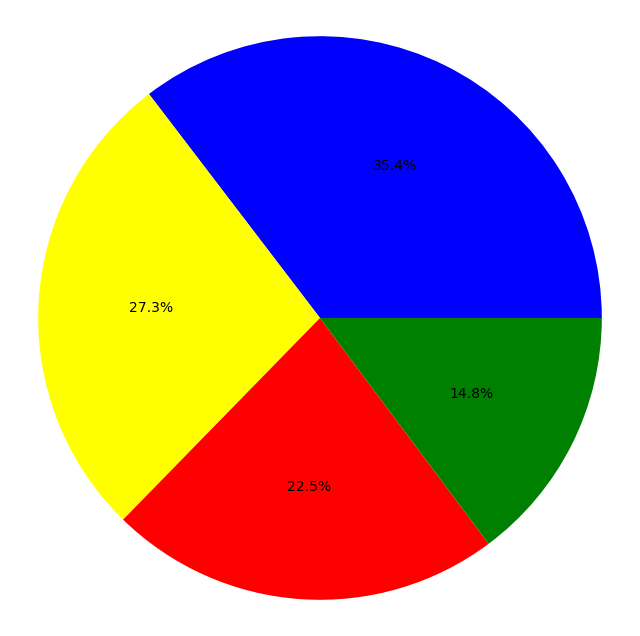

In [15]:
cateogery_totals=df[['Electronics','Clothing','Home_Goods','Toys']].sum()
plt.figure(figsize=(8,8))
plt.pie(cateogery_totals,autopct='%1.1f%%',colors=['blue','yellow','red','green'])
plt.axis('equal')
plt.show()

In [16]:
df=pd.read_csv('d4.csv')

In [17]:
df.head()

,Customer_Segment,Age_Group,Total_Sales,Average_Spending,Product_Category_A,Product_Category_B,Product_Category_C
0,Segment A,18-25,50000,2500,15000,20000,15000
1,Segment B,26-35,75000,3000,25000,30000,20000
2,Segment C,36-45,100000,4000,30000,40000,30000
3,Segment D,46-55,60000,2000,20000,15000,25000
4,Segment E,56-65,45000,1500,10000,12000,13000


In [18]:
sales_by_segment=df.groupby('Customer_Segment')['Total_Sales'].sum()

In [19]:
sales_by_segment

Customer_Segment
Segment A    157000
Segment B    232000
Segment C    300000
Segment D    187000
Segment E    128000
Segment F     97000
Name: Total_Sales, dtype: int64

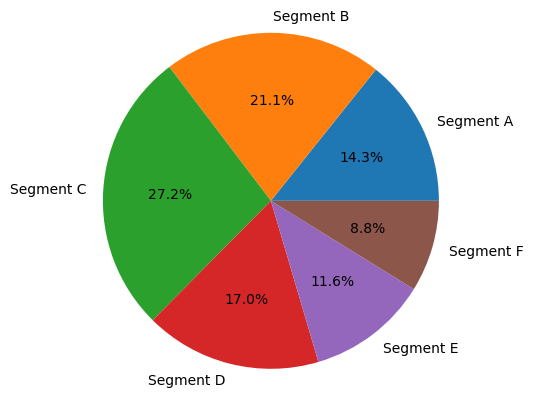

In [20]:
plt.pie(sales_by_segment,autopct='%1.1f%%',labels=sales_by_segment.index)
plt.axis('equal')
plt.show()

In [22]:
avg_spending=df.groupby('Customer_Segment')['Average_Spending'].mean()
avg_spending

Customer_Segment
Segment A    2616.666667
Segment B    3100.000000
Segment C    4000.000000
Segment D    2100.000000
Segment E    1416.666667
Segment F    1100.000000
Name: Average_Spending, dtype: float64

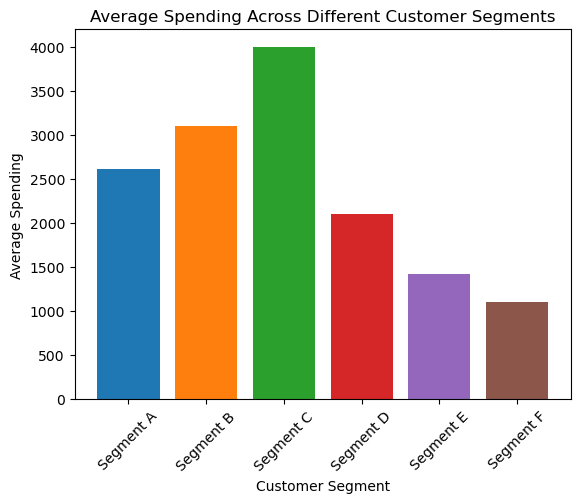

In [24]:
plt.bar(avg_spending.index,avg_spending,color=plt.cm.tab10.colors[:len(avg_spending)])
plt.title('Average Spending Across Different Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.show()

In [25]:
age_group_mapping = {
'18-25': 1, '26-35': 2, '36-45': 3, '46-55': 4, '56-65': 5, '66+': 6
}
df['Age_gr_numeric']=df['Age_Group'].map(age_group_mapping)
colors = plt.cm.Set2.colors
unique_segments = df['Customer_Segment'].unique()
plt.figure(figsize=(10, 6))
for i, segment in enumerate(unique_segments):
 segment_data = df[df['Customer_Segment'] == segment]
 plt.scatter(segment_data['Age_Group_Numeric'],segment_data['Average_Spending'],
 label=segment, color=colors[i % len(colors)], s=100)

plt.title('Relationship Between Customer Age and Spending')
plt.xlabel('Age Group')
plt.ylabel('Average Spending')
plt.xticks(ticks=list(age_group_mapping.values()),labels=list(age_group_mapping.keys()))
plt.legend(title="Customer Segment")
plt.show()

KeyError: 'Age_Group_Numeric'

<Figure size 1000x600 with 0 Axes>